# Does Money Bring Happiness?

Can we find  correlation between wealth and happiness? To investigate that, we can use the World Happiness dataset, and perform a regression analysis with the countrys GDP per capita, which is a greater indicator of how rich a country is

### Importing our dataset and taking a look at it

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/world-happiness/2018.csv')

df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


These are the top 10 happiest countries according to this score

### Ploting a histogram

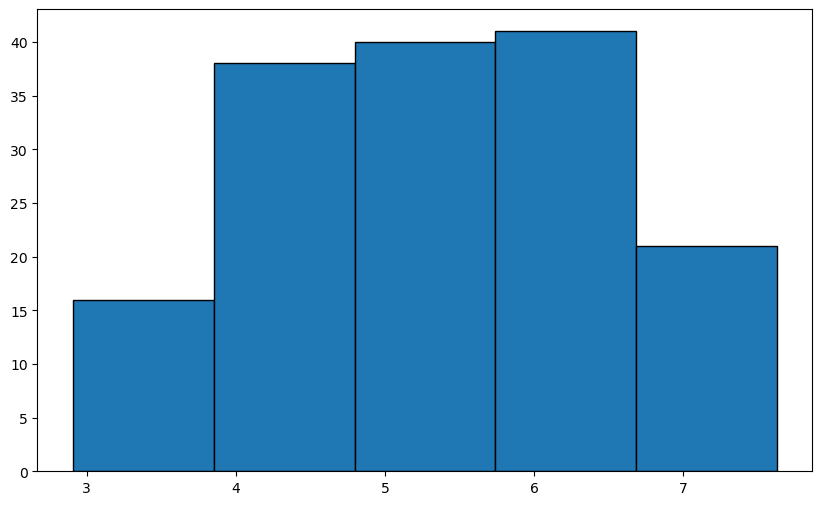

In [3]:
plt.figure(figsize=(10,6))
plt.hist(df['Score'], bins = 5, edgecolor = 'black')

plt.show()

As expected, the distribution has a "normal" shape, with most of its values being concentrated around the average of the score

### Importing the GDP per capita Dataset

In [4]:
df_gdp = pd.read_csv(r'/kaggle/input/gdp-per-capita-all-countries/GDP.csv')

# ATETTION: 'Country ' HAS A BLANK SPACE
df_gdp[['Country ', '2018']].head(5)

,Country,2018
0,Aruba,NaN
1,Afghanistan,1955.006208
2,Angola,6452.355165
3,Albania,13364.155400
4,Arab World,17570.137600


Now merging it with the Happiness Dataset

In [5]:
df_merged = pd.merge(df, df_gdp[['Country ', '2018']], 
                     right_on='Country ', 
                     left_on='Country or region', 
                     how='inner')# only rows that exits on both that datasets will be brougth

df_merged = df_merged.drop('Country ', axis=1)

# Deleting rows without GDP data
df_merged = df_merged.dropna(subset=['2018'])

df_merged

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,2018
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,48416.936030
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,65510.585270
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,55671.165270
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,57303.060780
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,68060.941050
...,...,...,...,...,...,...,...,...,...,...
131,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,1308.629536
132,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,2251.556388
133,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,3240.262937
135,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,859.935620


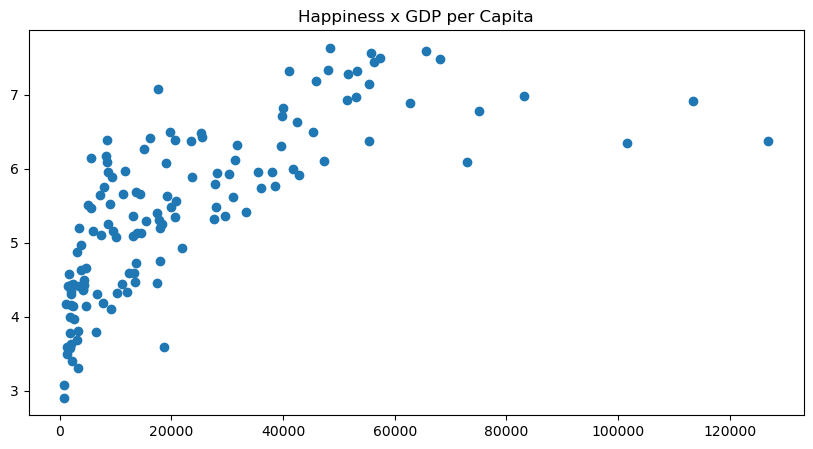

In [6]:
y = df_merged['Score']
x = df_merged['2018']

plt.figure(figsize= (10,5))
plt.title('Happiness x GDP per Capita')
plt.scatter(x,y)

plt.show()

Already at first glance, the graph seems to have an upwards trend. Suggesting a positive correlation between GDP per capita and happiness. But we should notice that after a certain level of GDP per capita, the happiness score seems to decrease. If we want a function that fits that data, a good call would be a *quadratic function*:

**(f(x) = ax² + bx + c)**

### Performing the quadratic regression

Let's import the needed libraries for this. SciKit Learn doesn't have an already built quadratic model. So we'll need to use LinearRegression alonside PolynomialFeatures. We'll be using Numpy as well

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Quadratic model

### f(x) = ax² + bx + c

Regression:
y = -5.086896549198446e-10 x² + 7.8717642629266e-05x + 4.18     R² = 0.68 


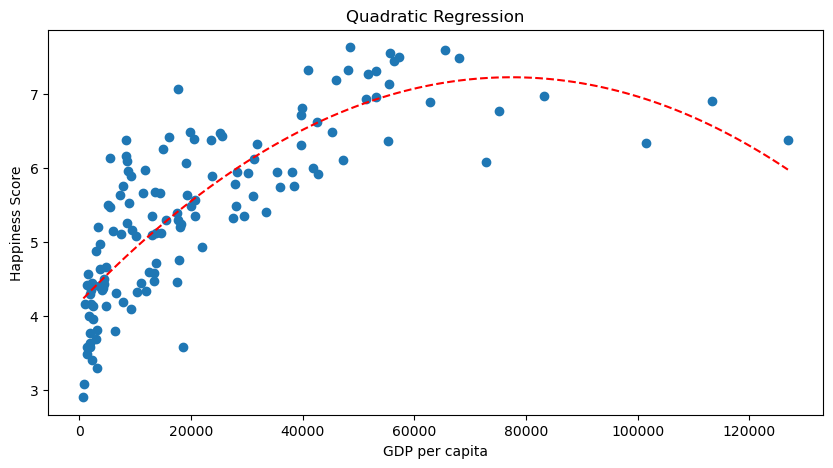

In [10]:
# Defining x and f(x)
X = df_merged['2018'].values.reshape(-1, 1)  
y = df_merged['Score']  # explained variable (f(x))

# Setting polynomial features to 2nd degree (quadratic)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Creating and adjusting the regression model
reg = LinearRegression().fit(X_poly, y)

# Getting a, b and c
coef = reg.coef_ # the values of a and b are now stored in this array
c = reg.intercept_

# Calculating the coefficient of determination (R²)
r2 = reg.score(X_poly,y)

# Printing our function
print(f"Regression:\ny = {coef[2]} x² + {coef[1]}x + {round(c,2)}     R² = {round(r2, 2)} ")

# Y = (coef[2] * X ** 2) + (coef[1] * X)+ c

# Generatig values for x
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predicting the values with the model for plotting the regression
y_pred = reg.predict(poly_features.transform(x_values))

plt.figure(figsize= (10,5))

plt.title("Quadratic Regression")
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')

plt.scatter(X,y)

plt.plot(x_values, y_pred, '--r')

plt.show()

### Our regression function:

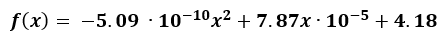

**Now we have our regression function and a satisfactory R² value. The closer R² is to 1 the more we can trust on the validity of our model**

The values of a and b appear to be very small, but that's due the fact that the variables we chose to build our model upon are from totally different scales. The score goes from 0 to 10, while GDP per capita goes from 0 to 120 thousand.

We can also calculate which would the certain level of GDP per capita that after it, happiness would decrease instead of increasing. That would be the x (GDP per capita) value that gives the maximum value of y (happiness) of the quadratic function we found

In [11]:
max_index = np.argmax(y_pred)

# Assuming x_values is the array of x values used in the regression
x_max = x_values[max_index]

print(x_max)

[77201.29954352]


That's it according to our model, GDP has a limit of bringing happiness, and it's at the **$ 77201.30** mark